In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import geopandas as gpd
from matplotlib.path import Path

import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM

In [23]:
crime = pd.read_csv('data/crime_london_new.csv')
crime.drop(columns=crime.columns[0], inplace=True)
total_crime = crime[crime.columns[3:]]
monthly_crime = pd.DataFrame(total_crime.sum()).reset_index()
monthly_crime.rename(columns={"index": "Date"}, inplace=True)
monthly_crime["Date"] = pd.to_datetime(monthly_crime["Date"], format="%Y%m")
monthly_crime.set_index("Date", inplace=True)
monthly_crime.rename(columns={0: "CrimeCount"}, inplace=True)

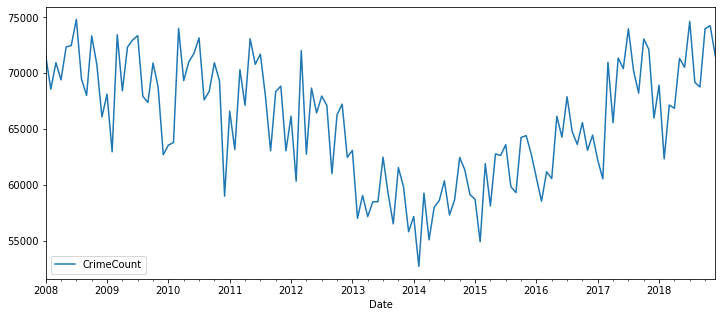

In [29]:
monthly_crime.plot(figsize=(12,5))

In [30]:
monthly_crime.to_csv("monthly_total_crime.csv")